# Forecast E-Commerce Sales Data Analysis

__Ojbective__ : To analyse the Sales of Amazon(an E-Commerce site) during Q2 2022.

Amazon is a major E-Commerce Site that has millions of active user over the world. We will specifically focus on the sales of Amazon in **India only**.

## Data Collection
The dataset used here is obtained from kaggle. The Dataset can be found [here](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data).


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Adding the csv dataset to a pandas DataFrame

amazon = pd.read_csv('./data/Amazon Sale Report.csv', low_memory=False)

Initial View of data

In [3]:
# Initial view of the Dataset
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
# Counting the number of unique values in the data and converting it to a dataframe for easy viewing
amazon.nunique().to_frame(name="Number of unique values")

,Number of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [6]:
# Getting the unique values from the data
amazon.apply(pd.unique).to_frame(name="Unique Values")

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


The Above data shows that the data is not clean and thus not yet ready for analysis as it contains a lot of missing data and unnecessary coloums probably inconsistent.

In [7]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [8]:
amazon.describe(include='O').T

,count,unique,top,freq
Order ID,128975,120378,171-5057375-2831560,12
Date,128975,91,05-03-22,2085
Status,128975,13,Shipped,77804
Fulfilment,128975,2,Amazon,89698
Sales Channel,128975,2,Amazon.in,128851
ship-service-level,128975,2,Expedited,88615
Style,128975,1377,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [9]:
# Counting all the null values in each column
amazon.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

## Data Cleaning

In [10]:
# Dropping non required columns.
amazon.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [11]:
# Checking all the duplicate values in the data
amazon[amazon.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [12]:
# Counting the number of dupliates
len(amazon)-len(amazon.drop_duplicates(['Order ID','ASIN']))

7

In [13]:
# Removing the duplicates
amazon.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

### Filling the missing values i.e. NaN values

In [14]:
# Setting missing Courier Status as unknown
amazon['Courier Status'] = amazon['Courier Status'].fillna('unknown')

In [15]:
# Setting the missing promotions as "no promotions" 
amazon['promotion-ids'] = amazon['promotion-ids'].fillna('no promotion')

In [16]:
# Finding the percentage of status of order for only NaN amounts
amazon[amazon['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [17]:
# Setting the missing amount as 0
amazon['Amount'] = amazon['Amount'].fillna(0)

In [18]:
# Setting missing ship-city, ship-state and ship-postal-code as unknown
amazon['ship-city'] = amazon['ship-city'].fillna('unknown')
amazon['ship-state'] = amazon['ship-state'].fillna('unknown')
amazon['ship-postal-code'] = amazon['ship-postal-code'].fillna('unknown')

In [19]:
amazon.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

### Renaming the columns

In [20]:
# Renaming Coloumns for easy access
replacement_names = {'Order ID':'order_ID', 'Date':'date', 
               'Status':'ship_status',
               'Fulfilment':'fullfilment',
               'ship-service-level':'service_level', 
               'Style':'style', 
               'SKU':'sku', 
               'Category':'product_category', 
               'Size':'size', 
               'ASIN':'asin', 
               'Courier Status':'courier_ship_status', 
               'Qty':'order_quantity', 
               'Amount':'order_amount', 
               'ship-city':'city', 
               'ship-state':'state', 
               'ship-postal-code':'zip', 
               'promotion-ids':'promotion',
               'B2B':'customer_type'
               }

amazon.rename(columns=replacement_names, inplace =True)


### Convert B2B i.e. customer_type values

In [21]:
amazon['customer_type'] = amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'])

### Adding datatime and Month Columns to the data

In [22]:
amazon['date'] = pd.to_datetime(amazon['date'])

/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/1895549944.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon['date'] = pd.to_datetime(amazon['date'])


In [23]:
# Filter to only include dates in March
march_dates = amazon['date'][amazon['date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [24]:
# dropping March dates from the dataset since it has only 1 entry
amazon = amazon[(amazon['date'].dt.month != 3)]

In [25]:
amazon['month'] = amazon['date'].dt.month
amazon["month"].unique()

array([4, 5, 6], dtype=int32)

In [26]:
# month_map = {3: 'march', 4: 'april', 5: 'may', 6: 'june'}
month_map = {4:'april', 5:'may', 6:'june'}
amazon['month'] = amazon['date'].dt.month.map(month_map)

In [27]:
# Define the desired order of months
# month_order = ['march', 'april', 'may', 'june']
month_order = ['april', 'may', 'june']

# Convert the month column to a categorical data type with the desired order
amazon['month'] = pd.Categorical(amazon['month'], categories=month_order, ordered=True)

In [28]:
print(f'This dataset contains the months {amazon["month"].unique()} for 2022')
print(f'The earliest date is {amazon["date"].min()}')
print(f'The latest date is {amazon["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


### Setting order for the sizes

In [29]:
# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
amazon['size'] = pd.Categorical(amazon['size'], categories=size_order, ordered=True)

## Data Visualization

### Checking the final data

In [30]:
amazon.describe(include='all')

,order_ID,date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount,city,state,zip,promotion,customer_type,month
count,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797.000000,128797.000000,128797,128797,128797.0,128797,128797,128797
unique,120220,NaN,13,2,2,1377,7194,9,11,7189,4,NaN,NaN,8953,70,9460.0,5784,2,3
top,171-5057375-2831560,NaN,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer,april
freq,12,NaN,77664,89543,88460,4221,772,50206,22679,772,109331,NaN,NaN,11200,22235,1004.0,49088,127926,49065
mean,NaN,2022-05-12 13:11:06.099365632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904439,609.392086,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,413.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,583.040000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,771.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,5584.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Checking null values
amazon.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       0
size                   0
asin                   0
courier_ship_status    0
order_quantity         0
order_amount           0
city                   0
state                  0
zip                    0
promotion              0
customer_type          0
month                  0
dtype: int64

In [32]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_ID,120220
date,90
ship_status,13
fullfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [33]:
amazon.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
service_level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
asin,"[B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7..."


### Insight

In [34]:

revenue_by_month = amazon.groupby('month', observed = False)['order_amount'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * 100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * 100
total_decrease = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * 100
print(f"Total revenue for April 2022: ₹{revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: ₹{revenue_by_month['may']:,.2f}, i.e. -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ₹{revenue_by_month['june']:,.2f}, i.e. -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "₹{:,.2f}".format(x)))
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)
print("\n")

avg_price_by_category = amazon.groupby('product_category')['order_amount'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("\n")

cancelled_orders = amazon[amazon['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = amazon[amazon['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(amazon) * 100
percent_returned = total_returned / len(amazon) * 100
percent_cancelled_returned = total_cancelled_returned / amazon['order_quantity'].sum() * 100
print(f"Total cancelled orders: {total_cancelled}, i.e. {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, i.e. {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")
print("\n")


popular_category_by_state = amazon.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("\n")

avg_order_amount_by_customer_type = amazon.groupby('customer_type')['order_amount'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "₹{:,.2f}".format(x)))

Total revenue for April 2022: ₹28,838,708.32
Total revenue for May 2022: ₹26,224,517.75, i.e. -9.06% decrease from April.
Total revenue for June 2022: ₹23,424,646.38, i.e. -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


Total revenue by product category:
product_category
Set              ₹39,148,138.03
kurta            ₹21,264,270.13
Western Dress    ₹11,208,419.41
Top               ₹5,343,281.30
Ethnic Dress        ₹790,118.66
Blouse              ₹458,128.18
Bottom              ₹150,667.98
Saree               ₹123,933.76
Dupatta                 ₹915.00
Name: order_amount, dtype: object


Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount, dtype: object


Top 5 product categories by average price:
product_category
Set 

### Visuals

In [35]:
import matplotlib.pyplot as plt

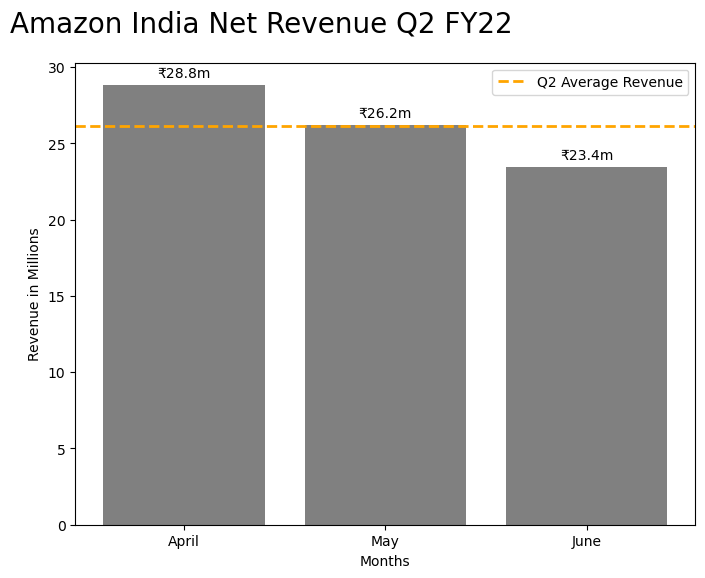

In [36]:
avg_revenue = revenue_by_month.mean()/1000000
plt.subplots(figsize=(8,6))
plt.bar(x=[x.capitalize() for x in month_order], height=revenue_by_month.apply(lambda x: x/1000000), color="grey")
plt.axhline(avg_revenue, linestyle='--', color='orange',linewidth=2, label='Q2 Average Revenue')
plt.xlabel("Months")
plt.ylabel("Revenue in Millions")
for i, v in enumerate(revenue_by_month.apply(lambda x: x/1000000)):
    plt.text(i, v+0.5, f"₹{v:,.3}m", ha='center', color='black')
plt.title('Amazon India Net Revenue Q2 FY22', fontsize=20, x=.3, y=1.05)
plt.legend()
plt.show()

The change in Average Monthly Order Amount from April to June is 6.0%


/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/3682082907.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apr_val = monthly_aov['average_order_value'][0]
/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/3682082907.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jun_val = monthly_aov['average_order_value'][2]


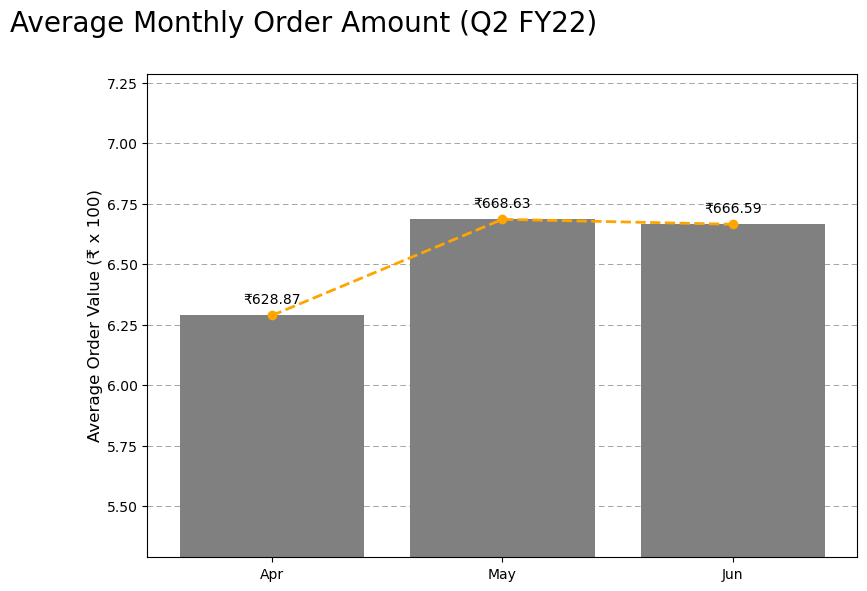

In [37]:
# Group the data by month and calculate the average order value
monthly_aov = amazon.groupby(pd.Grouper(key='date', freq='ME')).agg({'order_amount': 'sum', 'order_ID': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount'] / monthly_aov['order_ID']

# Calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
print(f"The change in Average Monthly Order Amount from April to June is {pct_change:,.2}%")

# Create a barplot of the average order value per month
plt.subplots(figsize=(8,6))
ydata = [x/100 for x in monthly_aov['average_order_value']]
plt.ylim(min(ydata)-1,min(ydata)+1)
plt.bar(x=monthly_aov.index.strftime('%b'), height=[x/100 for x in monthly_aov['average_order_value']], color='grey')

# Add line plot of the average order value per month
plt.plot(monthly_aov.index.strftime('%b'), [x/100 for x in monthly_aov['average_order_value']], linestyle='--', linewidth=2, color='orange', marker='o')

plt.title('Average Monthly Order Amount (Q2 FY22)', fontsize=20, x=.22, y=1.07)
plt.xlabel(None)
plt.ylabel('Average Order Value (₹ x 100)', fontsize=12, labelpad=3)
plt.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5), axis='y')

for i, v in enumerate(ydata):
    plt.text(i, v+0.05, f"₹{v*100:,.2f}", ha='center', color='black')

plt.tight_layout()
plt.show()

/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/3243542045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])
/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/3243542045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['month'] = sales_data['date'].dt.month_name()


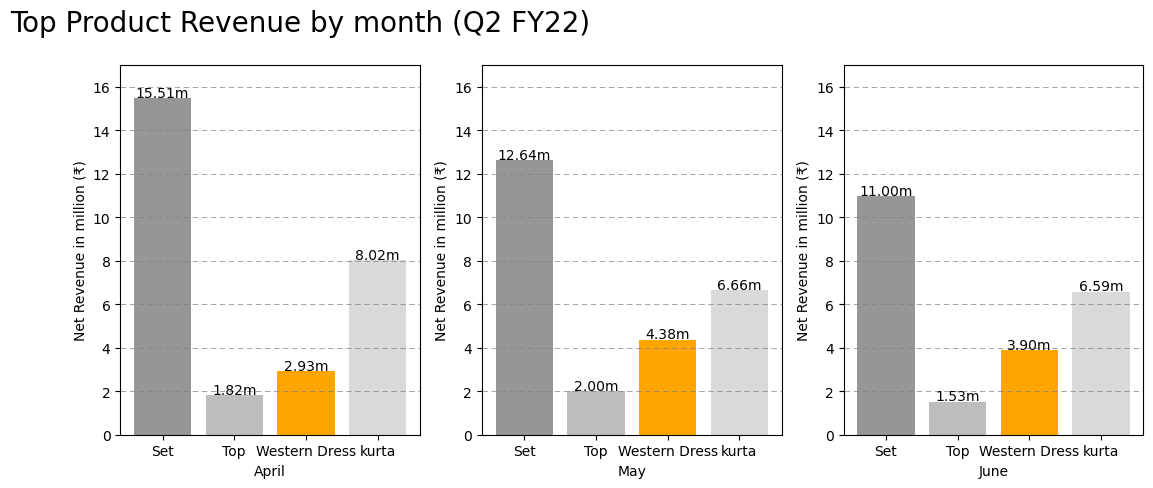

In [38]:
# Define the desired order of months
month_order = ['April', 'May', 'June']

# Filter the data to only include the four product categories of interest
sales_data = amazon[amazon['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

# Convert the date column to a datetime object
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract the month from the date column and set it as a new column
sales_data['month'] = sales_data['date'].dt.month_name()

# Aggregate the sales data by month and product category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount'].sum().reset_index()

# Convert the month column to a categorical data type with the desired order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

apr_sale = sales_by_month[sales_by_month['month']=='April']
may_sale = sales_by_month[sales_by_month['month']=='May']
jun_sale = sales_by_month[sales_by_month['month']=='June']

plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
plt.title('Top Product Revenue by month (Q2 FY22)', fontsize=20, x=.6, y=1.07)
plt.bar(x=apr_sale['product_category'], height=apr_sale['order_amount']/1000000, color=['#969696', '#bdbdbd', 'orange', '#d9d9d9'])
plt.ylabel("Net Revenue in million (₹)")
plt.xlabel("April")
plt.ylim(0,17)
plt.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5), axis='y')
for i, v in enumerate(apr_sale['order_amount']/1000000):
    plt.text(i, v+0.05, f"{v:,.2f}m", ha='center', color='black')

plt.subplot(1,3,2)
plt.bar(x=may_sale['product_category'], height=may_sale['order_amount']/1000000, color = ['#969696', '#bdbdbd', 'orange', '#d9d9d9'])
plt.ylabel("Net Revenue in million (₹)")
plt.xlabel("May")
plt.ylim(0,17)
plt.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5), axis='y')
for i, v in enumerate(may_sale['order_amount']/1000000):
    plt.text(i, v+0.05, f"{v:,.2f}m", ha='center', color='black')

plt.subplot(1,3,3)
plt.bar(x=jun_sale['product_category'], height=jun_sale['order_amount']/1000000, color = ['#969696', '#bdbdbd', 'orange', '#d9d9d9'])
plt.ylabel("Net Revenue in million (₹)")
plt.xlabel("June")
plt.ylim(0,17)
plt.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5), axis='y')
for i, v in enumerate(jun_sale['order_amount']/1000000):
    plt.text(i, v+0.05, f"{v:,.2f}m", ha='center', color='black')

plt.tight_layout()
plt.show()

/var/folders/wm/_20v6fjx6zgftdxpb1z76x580000gn/T/ipykernel_56276/3494668283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = amazon.groupby('size')['order_amount'].sum().apply(lambda x: x/1000000)


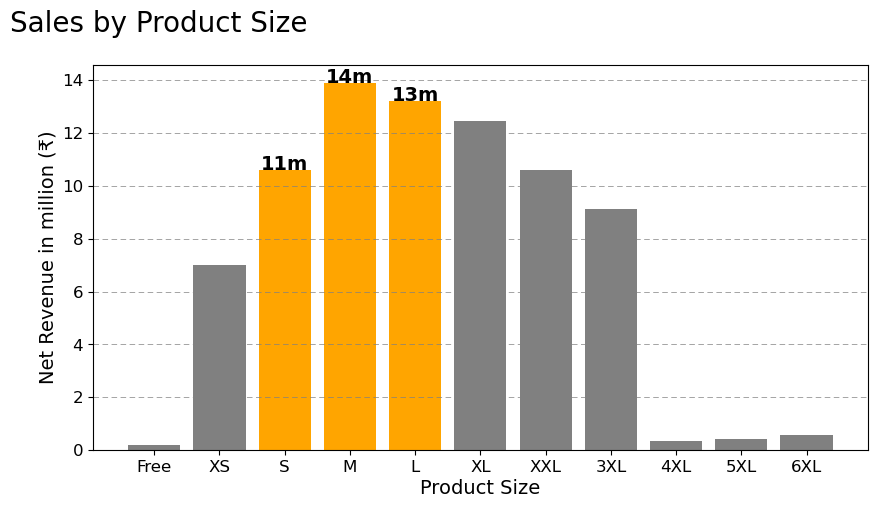

In [39]:
# Group the data by product size and calculate the total sales
sales_by_size = amazon.groupby('size')['order_amount'].sum().apply(lambda x: x/1000000)

# Create a horizontal bar chart to show the sales by product size
plt.subplots(figsize=(10,5))

# Use a color palette to highlight specific sizes
colors = ['orange' if size in ['S', 'M', 'L'] else 'grey' for size in sales_by_size.index]
plt.bar(x=sales_by_size.index, height=sales_by_size.values, color=colors)


# Set font sizes for x and y labels, title, and ticks
plt.xlabel('Product Size', labelpad=3, fontsize=14)
plt.ylabel('Net Revenue in million (₹)', labelpad=3, fontsize=14)
# plt.yticklabels(list(range(0,20,2)))
plt.title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
#ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)

plt.tick_params(axis='both', labelsize=12)
plt.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5), axis='y')


# Set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L']:
        plt.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]:.0f}m', ha='center', fontsize=14, fontweight='bold', color='black')


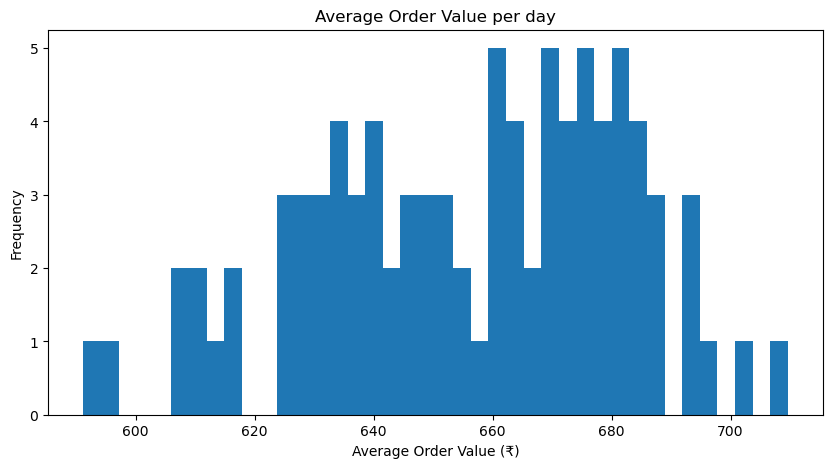

In [40]:
# Getting Average Order value per day
day_aov = amazon.groupby(pd.Grouper(key='date', freq='D')).agg({'order_amount': 'sum', 'order_ID': 'nunique'})
day_aov['average_order_value'] = day_aov['order_amount'] / day_aov["order_ID"]

plt.subplots(figsize=(10,5))
plt.hist(day_aov['average_order_value'], bins=40)
plt.title("Average Order Value per day")
plt.xlabel("Average Order Value (₹)")
plt.ylabel("Frequency")
plt.show()